 # Import libraries


In [1]:
# Import libraries
import numpy as np
import pandas as pd
# Data Visualization
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px 
# K-Means Cluster
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
from sklearn.cluster import KMeans 
# Ignore warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# load dataset
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")   
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})   

In [4]:
df.isnull().sum(axis = 0)
  

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Prepare data


In [5]:
df_cluster = df.copy()
df_cluster = df_cluster.drop(['customerID', 'TotalCharges'], axis=1)
## Scale Tenure and Monthly Charges
scaler = StandardScaler()
df_cluster[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df_cluster[['tenure', 'MonthlyCharges']])

#Selecting all variables except tenure and Monthly Charges
df_cluster[df_cluster.columns[~df_cluster.columns.isin(['tenure','MonthlyCharges'])]] = encoder.fit_transform(df_cluster[df_cluster.columns[~df_cluster.columns.isin(['tenure','MonthlyCharges'])]]) 

# K-means Clusters 

In [6]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10, 7))
    plt.plot(means, inertias, 'o-', color = 'Blue')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

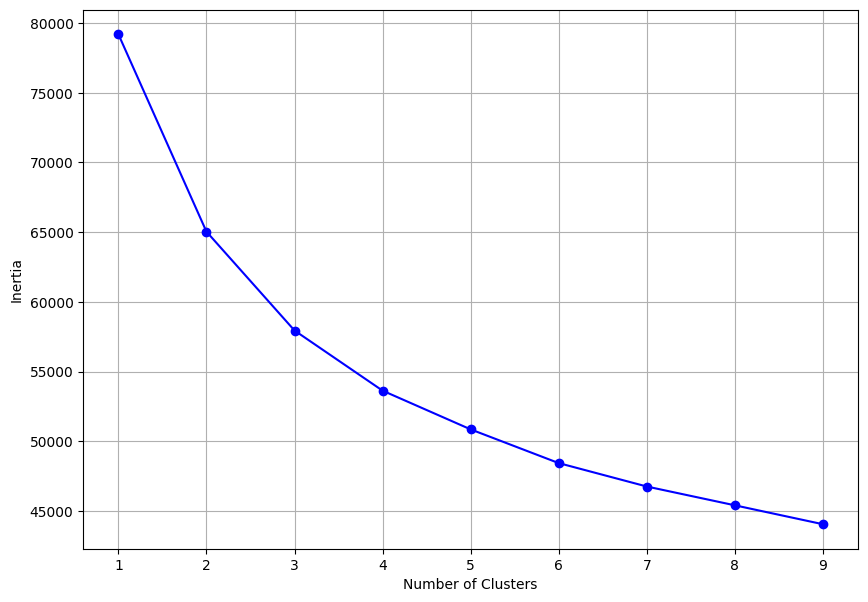

In [7]:
optimise_k_means(df_cluster, 10)


 **four Cluster seems to be Good**
 

# K-Means cluster analysis


In [8]:
kmeans = KMeans(n_clusters = 4,  random_state=10)
kmeans.fit(df_cluster)
# Save cluster group as a column value in our data_frame
df_cluster['Cluster'] = kmeans.labels_ 

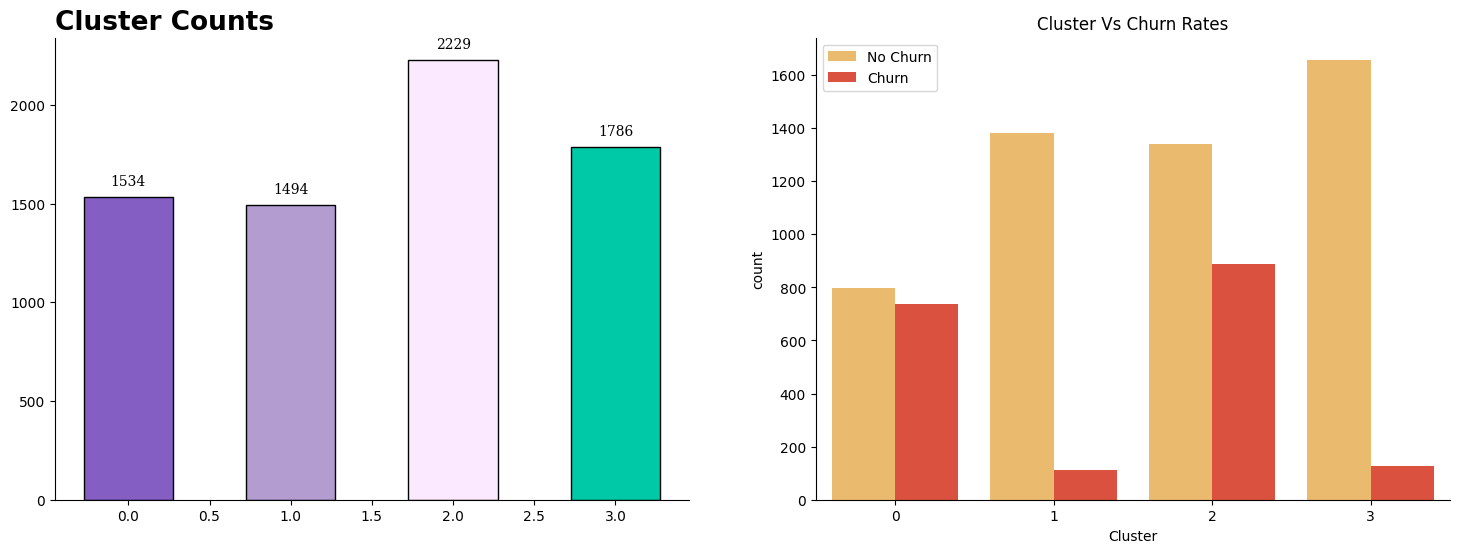

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster Counts
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
data_temp = df_cluster['Cluster'].value_counts().sort_index()
ax[0].bar(data_temp.index, data_temp,
          edgecolor='black', color=['#845EC2', '#B39CD0', '#FBEAFF', '#00C9A7'],
          width=0.55)
ax[0].set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')
for i in data_temp.index:
    ax[0].annotate(f"{data_temp[i]}",
                   xy=(i, data_temp[i] + 80),
                   va='center', ha='center', fontweight='light', fontfamily='serif',
                   color='black')
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)

sns.countplot(x='Cluster', hue="Churn", palette="YlOrRd", data=df_cluster)
sns.despine()
plt.legend(title='', loc='upper left', labels=['No Churn', 'Churn'])
plt.title("Cluster Vs Churn Rates")
plt.show()


**Clusters 0 and 2 have a higher Churn Rate compared to Cluster 1 and 3**


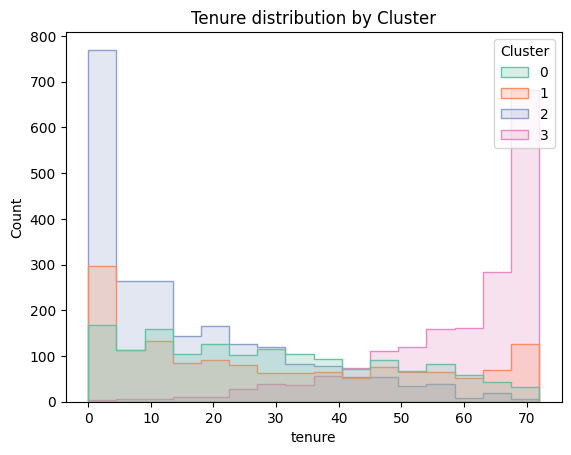

In [10]:

df['Cluster'] = df_cluster['Cluster']
sns.histplot(data=df, x="tenure", hue="Cluster", element="step", palette="Set2")
plt.title('Tenure distribution by Cluster') 
plt.show()


**Cluster 0 and 2 have shorter tenure compared to the other clusters**



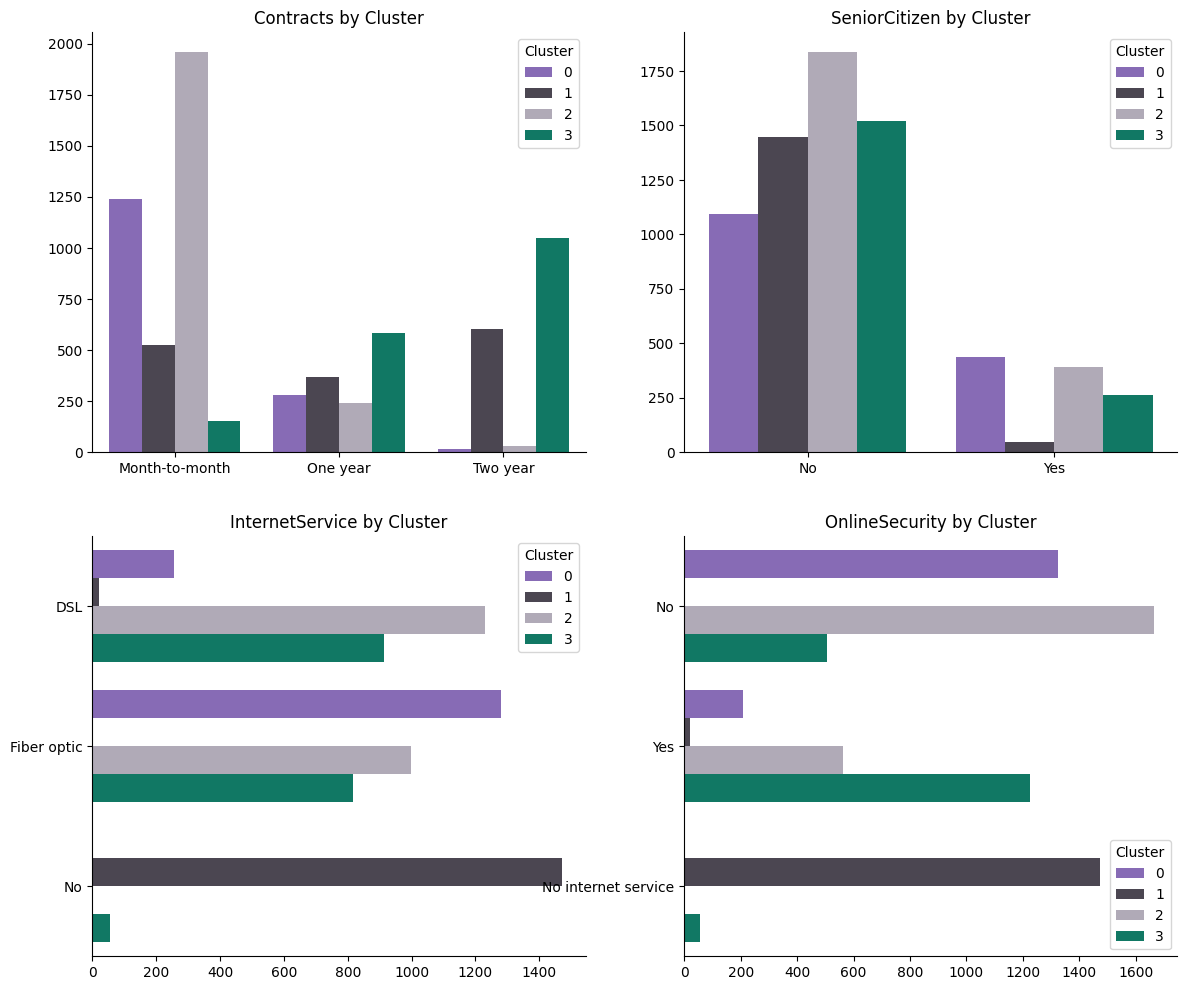

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
sn.despine()

# Gray for No Churn, highlight Churn!
colors = ["#845EC2", "#4B4453", "#B0A8B9","#00896F"]
# Set custom color palette
sn.set_palette(sn.color_palette(colors))
ax = sn.countplot(x="Contract", hue="Cluster", data=df, ax = axes[0,0]).set(title='Contracts by Cluster', xlabel=None, ylabel = None)
ax = sn.countplot(x="SeniorCitizen", hue="Cluster", data=df, ax = axes[0,1]).set(title='SeniorCitizen by Cluster', xlabel=None, ylabel = None)
ax = sn.countplot(y='InternetService', hue="Cluster", data=df,ax = axes[1,0]).set(title='InternetService by Cluster', xlabel=None, ylabel = None)
ax = sn.countplot(y='OnlineSecurity', hue="Cluster", data=df, ax = axes[1,1]).set(title='OnlineSecurity by Cluster', xlabel=None, ylabel = None)
sn.despine() 

# conculsion 
**Clusters 0 and 2 are typically**

- in the Month - to Month Contract
- More likely to be elderly
- Does not have Online Security
- Uses Fiber optic